**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [8]:
# ваш код
text = ["""Центральный окружной суд Сеула приговорил бывшего премьер-министра Южной Кореи Хан Док Су к 23 годам тюрьмы, следует из трансляции заседания.
«
"Подсудимый <...> приговаривается к 23 годам лишения свободы", — постановил суд. Фигуранта признали виновным в содействии введению военного положения в стране 3 декабря 2024 года. Согласно материалам дела, он предложил бывшему президенту Юн Сок Ёлю созвать заседание Государственного совета и обзванивал некоторых членов кабинета с просьбой "быстро прийти". Также его обвинили в подписании и уничтожении сделанного постфактум указа и лжесвидетельстве о том, что он не знал его текст. Спецпрокуратура пришла к выводу, что Хан Док Су пытался придать процедуре формальную законность, и потребовала для него 15 лет тюрьмы. Также она попросила суд учесть ущерб, нанесенный государству и народу, а также отказ экс-премьера от сотрудничества со следствием.
Это стало первым приговором из числа дел, где фигурантов обвиняют в участии, организации или помощи мятежу.""","""Неправильно говорить о том, что вакцина не работает против штамма гриппа H3N2, известного как гонконгский, заявил академик РАН, заместитель президента Российской академии образования Геннадий Онищенко.
"Мы прививку делали от 4 штаммов: H3N2, H1N1 и 2 штамма B. Доминирует H3N2. Собственно, тут структура заболеваемости не изменилась, субтип или как H3N2 клайд К, который более активно дрейфовал в своем иммунном статусе вот. Сегодня говорить, что та вакцина, который мы прививали и где содержался H3N2 не сработает не работает - это неверно", - сказал он в ходе пресс-конференции в Москве.
Он добавил, что H3N2 cейчас доминирует, его влияние будет расширяться.""","""Магнитные бури — сильное возмущение магнитного поля земли. С чем они связаны и чем вызваны, причины появления, что это такое на самом деле, их суть. Подробно о шкале и уровнях магнитных бурь, как магнитное поле влияет на организм человека и какие меры помогут не болеть во время природных изменений, — в материале РИА Новости. Те, кто жалуется на головную боль, боль в сердце и общее недомогание во время дождя или резкой перемены погоды, сложно переживают магнитные бури, которые случаются около шести раз в год и могут длиться больше недели. Геомагнитная буря, или магнитный шторм (другое название этого явления), может спровоцировать ухудшения в работе электрических устройств, интернета и мобильной связи. Действительно ли магнитные бури настолько опасны? “Магнитные бури - это явление, о котором многие говорят, но его реальная опасность зачастую сильно преувеличена. Как бизнес-психолог, я рассматриваю влияние таких факторов не только с точки зрения физического здоровья, но и того, как они отражаются на нашем психоэмоциональном состоянии и повседневной эффективности”, - говорит Екатерина Стецюра, эксперт в бизнес-психологии.
По словам эксперта, важно понимать: для большинства людей магнитные бури не представляют серьёзной угрозы. Основной дискомфорт испытывают те, кто уже подвержен стрессу или имеет проблемы с сердечно-сосудистой системой. В такие периоды действительно могут усиливаться головные боли, слабость, чувство разбитости. Но часто эти симптомы связаны не столько с магнитными бурями, сколько с общим состоянием организма и не готовностью человека адаптироваться к изменениям.""","""Посольство России в Финляндии задалось вопросом, кого и от чего ограждает забор, который Финляндия строит на границе с Россией.
Телерадиовещатель Yle сообщил во вторник, что забор, возведенный финскими властями на границе с Россией, впервые помог задержать нарушителя. "Оказалось, что задержанный пограничниками нарушитель является гражданином Финляндии и собирался пересечь границу не с российской, а с финской стороны", - говорится в комментарии посольства в распоряжении РИА Новости. В дипмиссии добавили, что сотрудники финской пограничной охраны воспринимают результат с подчеркнутым воодушевлением и надеются, что первый случай не станет последним, а также "не без гордости" упоминают высокотехнологичные решения, использованные при строительстве заграждения.""","""В Канаде растут опасения, что возможное присоединение Гренландии Соединёнными Штатами может создать прецедент и поставить под угрозу канадский суверенитет, пишет газета Wall Street Journal со ссылкой на неназванного депутата канадского парламента.
Ранее президент США Дональд Трамп неоднократно заявлял о намерении добиться приобретения Гренландии у Дании.
"Существует ненулевая вероятность того, что суверенитет Канады может быть нарушен, и если суверенитет Гренландии будет нарушен, следующими можем оказаться мы", - заявил канадский законодатель в комментарии газете.
Ранее, как сообщала газета The Globe and Mail со ссылкой на двух высокопоставленных правительственных источников, вооружённые силы Канады моделировали гипотетический сценарий вторжения американской армии и ответных действий канадских ВС, включая методы повстанческой борьбы, аналогичные тем, которые применяли афганские моджахеды.""","""На Мальдивах в одном из отелей начали принимать банковские карты "Мир". Правда, официальной информации о подключении страны к российской платежной системе пока нет. В каких государствах удобно с отечественным "пластиком", можно ли там снять деньги или только рассчитаться за покупки — в материале РИА Новости. Отправляющимся за границу россиянам туроператоры и экономисты советуют обязательно брать с собой наличные. "Исходите из прожиточного минимума в стране на два-три дня. При этом 50% нужно в долларах или евро, 30% — в местной валюте и еще 20% про запас в рублях", — рекомендует финансовый советник и основатель компании Rodin.Capital Алексей Родин.
Остальное — на картах, например китайских UnionPay, выпущенных отечественными кредитными учреждениями. Еще вариант — "пластик", выданный россиянам зарубежными банками, скажем, казахскими или белорусскими.""",""" С декабря по март — пик сезона в Африке. Главный хит у российских туристов — сафари. Но пляжный отдых тоже пользуется популярностью. Самые востребованные направления: Кения, Танзания, ЮАР. Как добраться, что посмотреть и сколько за это заплатить — в материале РИА Новости. Спрос на сафари-туры в Кению в этом году вырос на 25 процентов, ЮАР — на 18, Танзанию — 16, подсчитали в ITM Group."Африка, в частности Кения и Танзания, — популярное экзотическое направление. Не массовое, традиционно привлекает искушенных путешественников", — говорит Любовь Воронина, руководитель международных проектов "Слетать.ру" и управляющий директор туроператора Let's Fly. ЮАР также осваивают туристы, изучившие десятки стран. Обязательная программа — сафари. Можно увидеть "большую пятерку" животных: льва, леопарда, слона, буйвола и носорога. И понаблюдать за великой миграцией — ежегодным перемещением миллионов травоядных. Среди них: газели Томсона, антилопы гну, зебры, которые идут через африканские равнины в поисках подходящих пастбищ в сухой сезон. За стадами следуют хищники: львы, гепарды, леопарды.""","""Женщина украла снегоуборочную машину на Тимирязевской улице в Москве, подозреваемая задержана, возбуждено уголовное дело, сообщили в пресс-службе столичного главка МВД РФ.
В ведомстве отметили, что в полицию с заявлением о краже обратился представитель обслуживающей компании, который сообщил, что один из сотрудников, убиравший снег на Тимирязевской улице, заглушил снегоуборочную машину и ненадолго отошёл в подсобное помещение, забрав с собой ключи зажигания. Вернувшись, машину он не обнаружил. Материальный ущерб составил почти 140 тысяч рублей.
"В ходе несения службы сотрудники полиции ОМВД России по Тимирязевскому району г. Москвы в кратчайшие сроки недалеко от места происшествия задержали подозреваемую — 39-летнюю ранее судимую москвичку", - говорится на сайте ведомства.
Снегоуборочную машину изъяли и вернули владельцу.""","""Повесившую портреты террористов из "Русского добровольческого корпуса"* (РДК*, запрещенная в РФ террористическая организация) в школе 16-летнюю ученицу из Петербурга отправили в воспитательную колонию на 4 года, сообщили РИА Новости в объединенной пресс-службе судов города.
"Приговором 1-го Западного окружного военного суда ей назначено наказание в виде 4 лет лишения свободы в воспитательной колонии", - сказали в объединенной пресс-службе.
Девочка в декабре 2024 года повесила на стенде в школе в Кировском районе Петербурга портреты Дениса Капустина** и Алексея Левкина** из РДК* (внесены в перечень террористов и экстремистов Росфинмониторинга). По информации правоохранительных органов, после задержания она сообщала, что действовала по собственной инициативе. Тогда ее поместили под стражу, через несколько месяцев отпустили под домашний арест.""","""Группа российских альпинистов, застрявших на горе Сидли в Антарктиде из-за непогоды, оказались в критической ситуации, в условиях низких температур можно безопасно находиться при хорошем уровне подготовки до 10 дней, сообщил РИА Новости представитель Федерации альпинистов России.
Ранее Telegram-канал SHOT сообщил, что, по данным источника, сильная вьюга на высоте 1500 метров шестой день не дает двинуться с места 12 альпинистам во главе с гидами Артемом Ростовцевым и Александром Дорожуковым. Гора Сидли в Антарктиде представляет из себя потухший вулкан высотой 4285 метров. По ночам температура там опускается до минус 42 градусов.
По словам собеседника агентства, из-за условий в Антарктиде подъем на гору в четыре тысячи метров ощущается, как подъем на высоту в 6-8 тысяч метров.
"Низкие температуры, непогода, разряженный воздух, на высоте там 6 тысяч метров люди могут находиться дней 10, достаточно, скажем, в относительной безопасности, а потом уже наступает истощение организма. То есть ситуация у них сейчас критическая. Если непогода продлится достаточно долго, ну, скажем, несколько дней там - три, четыре, это будет уже ситуация близко к смерти", - отметил представитель федерации."""]

In [9]:
import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('punkt')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re
def normalize_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', text)
    text = re.sub(r'[0-9]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

normalized_documents = []
for doc in text:
    normalized_documents.append(normalize_text(doc))


print("Предобработанные тексты:")
for i, doc in enumerate(normalized_documents):
    print(f"текст {i+1}: {doc}")

Предобработанные тексты:
текст 1: центральный окружной суд сеула приговорил бывшего премьерминистра южной кореи хан док су к годам тюрьмы следует из трансляции заседания подсудимый приговаривается к годам лишения свободы постановил суд фигуранта признали виновным в содействии введению военного положения в стране декабря года согласно материалам дела он предложил бывшему президенту юн сок лю созвать заседание государственного совета и обзванивал некоторых членов кабинета с просьбой быстро прийти также его обвинили в подписании и уничтожении сделанного постфактум указа и лжесвидетельстве о том что он не знал его текст спецпрокуратура пришла к выводу что хан док су пытался придать процедуре формальную законность и потребовала для него лет тюрьмы также она попросила суд учесть ущерб нанесенный государству и народу а также отказ экспремьера от сотрудничества со следствием это стало первым приговором из числа дел где фигурантов обвиняют в участии организации или помощи мятежу
текст 2: неправ

In [11]:
!pip install pymorphy3


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pymorphy3
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


morph = pymorphy3.MorphAnalyzer()

def preprocess_text(text):
    # 1. Приведение к нижнему регистру
    text = text.lower()

    # 2. Токенизация
    tokens = word_tokenize(text, language='russian')

    # 3. Удаление стоп-слов и пунктуации
    russian_stopwords = set(stopwords.words('russian'))
    punctuation = set(string.punctuation)

    filtered_tokens = []
    for token in tokens:
        # Удаление пунктуации и токенов, состоящих только из пунктуации
        clean_token = ''.join(char for char in token if char not in punctuation)
        if clean_token and clean_token not in russian_stopwords:
            filtered_tokens.append(clean_token)

    # 4. Лемматизация
    lemmatized_tokens = []
    for token in filtered_tokens:
        parsed_token = morph.parse(token)[0] # Берем первый (наиболее вероятный) вариант разбора
        lemmatized_tokens.append(parsed_token.normal_form)

    return lemmatized_tokens

# Применяем предобработку (с лемматизацией) ко всем нормализованным документам
lemmatized_documents = []
for doc in normalized_documents:
    lemmatized_documents.append(preprocess_text(doc))


print("Предобработанные тексты:")
for i, doc in enumerate(lemmatized_documents):
    print(f"текст {i+1}: {doc}")
     

Предобработанные тексты:
текст 1: ['центральный', 'окружный', 'суд', 'сеул', 'приговорить', 'бывший', 'премьерминистр', 'южный', 'корея', 'хан', 'док', 'су', 'год', 'тюрьма', 'следовать', 'трансляция', 'заседание', 'подсудимый', 'приговариваться', 'год', 'лишение', 'свобода', 'постановить', 'суд', 'фигурант', 'признать', 'виновный', 'содействие', 'введение', 'военный', 'положение', 'страна', 'декабрь', 'год', 'согласно', 'материал', 'дело', 'предложить', 'бывший', 'президент', 'юный', 'сок', 'лю', 'созвать', 'заседание', 'государственный', 'совет', 'обзванивать', 'некоторый', 'член', 'кабинет', 'просьба', 'быстро', 'прийти', 'также', 'обвинить', 'подписание', 'уничтожение', 'сделать', 'постфактум', 'указ', 'лжесвидетельство', 'знать', 'текст', 'спецпрокуратура', 'прийти', 'вывод', 'хан', 'док', 'су', 'пытаться', 'придать', 'процедура', 'формальный', 'законность', 'потребовать', 'год', 'тюрьма', 'также', 'попросить', 'суд', 'учесть', 'ущерб', 'нанести', 'государство', 'народ', 'также', 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def process_lemmatized_documents(lemmatized_docs_list):

    processed_documents_str_local = [" ".join(doc) for doc in lemmatized_docs_list]

    count_vectorizer_local = CountVectorizer()


    bow_matrix_local = count_vectorizer_local.fit_transform(processed_documents_str_local)


    feature_names_local = count_vectorizer_local.get_feature_names_out()

    return bow_matrix_local, feature_names_local


bow_matrix, bow_feature_names = process_lemmatized_documents(lemmatized_documents)


bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=bow_feature_names,
    index=[f'Документ {i+1}' for i in range(len(lemmatized_documents))]
)


print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
             and  cейчас  fly  globe  groupафрика  itm  journal  lets  mail  \
Документ 1     0       0    0      0            0    0        0     0     0   
Документ 2     0       1    0      0            0    0        0     0     0   
Документ 3     0       0    0      0            0    0        0     0     0   
Документ 4     0       0    0      0            0    0        0     0     0   
Документ 5     1       0    0      1            0    0        1     0     1   
Документ 6     0       0    0      0            0    0        0     0     0   
Документ 7     0       0    1      0            1    1        0     1     0   
Документ 8     0       0    0      0            0    0        0     0     0   
Документ 9     0       0    0      0            0    0        0     0     0   
Документ 10    0       0    0      0            0    0        0     0     0   

             rodincapital  ...  экспремьера  экстремист  электрический  это  \
Документ 1              0  ..

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


tfidf_documents_str = [' '.join(doc) for doc in lemmatized_documents]

# Создание TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(tfidf_documents_str)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(tfidf_documents_str))]
)

# Вывод матрицы TF-IDF
print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
                  and    cейчас       fly     globe  groupафрика       itm  \
Документ 1   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 2   0.000000  0.125311  0.000000  0.000000     0.000000  0.000000   
Документ 3   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 4   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 5   0.089885  0.000000  0.000000  0.089885     0.000000  0.000000   
Документ 6   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 7   0.000000  0.000000  0.087097  0.000000     0.087097  0.087097   
Документ 8   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 9   0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
Документ 10  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   

              journal      lets      mail  rodincapital  ...  экспремьера  \
Документ 1   0.000000  0.000000  0.000000      0

In [16]:
import numpy as np

In [18]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)

word_bow_dict = dict(zip(bow_feature_names, bow_sum))


top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слова по всей коллекции ===\n")
print("Топ-10 слова по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


word_tfidf_dict = dict(zip(tfidf_feature_names, tfidf_sum))


top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слова по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")


print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")

=== Топ-10 слова по всей коллекции ===

Топ-10 слова по BOW (самые частые в коллекции):
- магнитный: 10 раз
- год: 9 раз
- буря: 8 раз
- который: 8 раз
- новость: 6 раз
- риа: 6 раз
- сообщить: 6 раз
- это: 6 раз
- говорить: 5 раз
- день: 5 раз

Топ-10 слова по TF-IDF (с наибольшим весом по всей коллекции):
- магнитный: 0.5468
- год: 0.5408
- буря: 0.4374
- который: 0.3968
- машина: 0.3805
- штамм: 0.3759
- граница: 0.3680
- россия: 0.3612
- канадский: 0.3595
- сообщить: 0.3575

Сравнение топ-10 слов:
Общие слова в обоих топ-10: сообщить, буря, который, магнитный, год
Только в BOW топ-10: новость, это, говорить, риа, день
Только в TF-IDF топ-10: штамм, россия, канадский, машина, граница


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 151.3 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 233.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 291.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 291.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 355.0 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 454.0 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 491.0 kB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


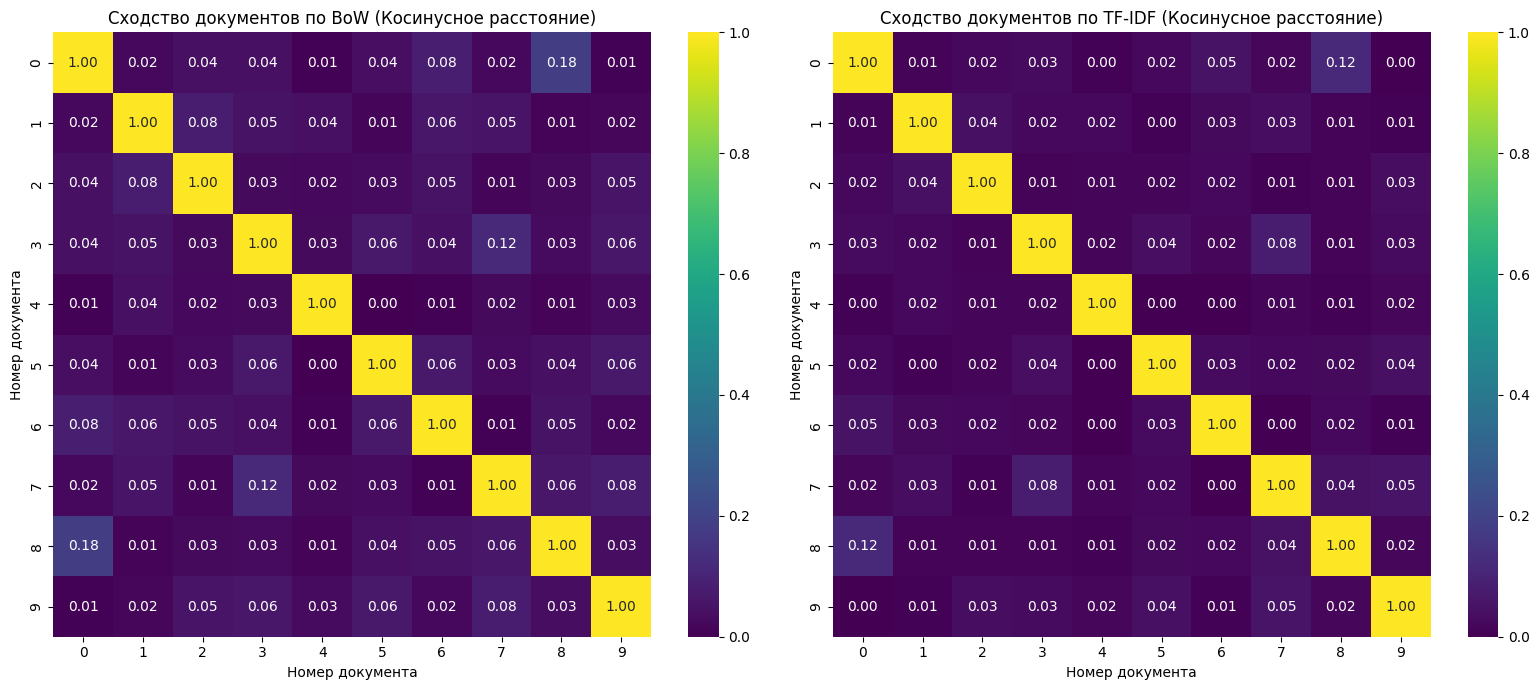

In [20]:
!pip install seaborn
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


bow_cosine_sim_matrix = cosine_similarity(bow_matrix)


tfidf_cosine_sim_matrix = cosine_similarity(tfidf_matrix)


fig, axes = plt.subplots(1, 2, figsize=(16, 7))


sns.heatmap(bow_cosine_sim_matrix, annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
axes[0].set_title('Сходство документов по BoW (Косинусное расстояние)')
axes[0].set_xlabel('Номер документа')
axes[0].set_ylabel('Номер документа')


sns.heatmap(tfidf_cosine_sim_matrix, annot=True, cmap='viridis', fmt=".2f", ax=axes[1])
axes[1].set_title('Сходство документов по TF-IDF (Косинусное расстояние)')
axes[1].set_xlabel('Номер документа')
axes[1].set_ylabel('Номер документа')

plt.tight_layout()
plt.show()

BoW (Bag of Words) оценивает сходство текстов только на основе частоты слов, что может приводить к завышенным показателям для документов с большим количеством общих служебных слов. TF-IDF решает эту проблему, учитывая важность слова в рамках всего корпуса: он снижает вес частотных слов и повышает значимость редких. Благодаря этому TF-IDF точнее отражает смысловую близость, выделяя тексты с общей узкой лексикой, а не просто с повторяющимися шумовыми словами.

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [21]:
# ваш код
russian_text = """Российскую фигуристку Камилу Валиеву дисквалифицировали на четыре года из-за положительной допинг-пробы, о которой стало известно во время Олимпиады-2022. Сборную России по фигурному катанию вместе с Валиевой лишили золота в командном турнире. Также у россиянки отняли титул чемпионки Европы, завоеванный за месяц до соревнований в Пекине.
Валиевой на момент Олимпиады было 15 лет. Из-за скандала в Пекине она оказалась под сильным давлением прессы и спортивных чиновников. «РБК Спорт» вспомнил, как развивались события на Олимпийских играх в столице Китая.
Международный олимпийский комитет (МОК) без объяснения причин несколько раз отложил церемонию награждения российской команды фигуристов золотыми медалями. Впоследствии стало известно, что причиной стал положительный допинг-тест 15-летней Валиевой.
Аккредитованная Всемирным антидопинговым агентством (WADA) лаборатория в Стокгольме выявила запрещенное вещество в пробе, взятой 25 декабря на победном для фигуристки чемпионате России. В анализах был обнаружен триметазидин (защищает сердце и мозг во время интенсивных нагрузок, находится в одном ряду с мельдонием).
Результаты тестов стали известны лишь 8 февраля, через день после победного (во многом усилиями Валиевой) для российских фигуристов командного турнира на Олимпиаде, хотя в соответствии с международными стандартами для лаборатории WADA срок для загрузки пробы А составляет 20 дней с момента получения образца.
Тренер спортсменки Этери Тутберидзе в 2023 году в интервью Леониду Слуцкому впервые рассказала, как узнала на Олимпиаде о положительной допинг-пробе у Валиевой.
«У меня день расписан... Я приезжаю с одной тренировки, у меня час времени. Мне звонят из федерации: «Срочно зайди в штаб!» А я хотела быстро хотя бы чай попить. Я сказала: «Нет, давай не сейчас». Нет, сказали, срочно! Первое, что я вижу: сидит Камила абсолютно бледного цвета, отекшая, заплаканная, 15 лет на тот момент... И тут я увидела ее лицо — что-то не так с мамой? Начинают объяснять, что она здесь уже час и с ней был допрос. Какого допинга? Почему час допрос с одной? Почему ее допрашивали?» — рассказала тренер.
Тутберидзе отметила, что даже не была знакома с препаратами, в составе которых находится триметазидин.
«И когда нам это сказали, я даже не поняла, что это за препарат. Дальше они говорят, что у нее был допинг обнаружен, ее нужно сейчас срочно вывезти с олимпийской деревни. А это же пандемия, закрытая Олимпиада. Куда вывезти? В таком состоянии. Куда ее вывезти в 15 лет? Они говорят: найдем гостиницу, ее там поселим. Я говорю: нет, вы ее никуда не повезете, мы ее оставляем здесь», — отметила Тутберидзе.
"""
english_text = """Prime Minister Mark Carney of Canada delivered a stark speech in Davos, Switzerland, on Tuesday, prompting global political and corporate leaders in the audience to rise from their seats for a rare standing ovation.

He described the end of the era underpinned by United States hegemony, calling the current phase “a rupture.” He never mentioned President Trump by name, but his reference was clear.

The speech came as President Trump doubled down on his threats to take Greenland away from Denmark, saying he would slap fresh tariffs on European powers as punishment for their support of Greenland’s sovereignty.

Global leaders have been scrambling to find a unified response.

“Every day we are reminded that we live in an era of great power rivalry,” Mr. Carney said. “That the rules-based order is fading. That the strong do what they can, and the weak suffer what they must.”

And he warned, “The middle powers must act together because if you are not at the table, we’re on the menu.”

He would know.

Mr. Trump started his second presidential term making claims on Canada as the 51st state and threatening Canada’s previous leader, Justin Trudeau, whom Mr. Trump publicly derided, with unilaterally scrapping agreements that have governed the relationship between the neighboring countries for over a century. He has imposed tariffs on Canada, which is one of America’s two top trading partners along with Mexico, that are crippling some of Canada’s key economic sectors, such as autos, steel, aluminum and lumber.

Mr. Trump’s allies, particularly Steve Bannon, have talked about the benefits of the United States annexing Canada to access its vast Arctic and natural resources, including critical minerals and rare earths. Mr. Carney chastised other leaders too, many of whom would have been following his speech in Davos, for not standing up for their interests.

“There is a strong tendency for countries to go along to get along,” he said. “To accommodate. To avoid trouble. To hope that compliance will buy safety. It won’t.”"""

In [22]:
!pip install nltk spacy pymorphy3
!pip install inflect

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect

nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/69.7 kB ? eta -:--:--
   ----------------------- ---------------- 41.0/69.7 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 69.7/69.7 kB 943.3 kB/s eta 0:00:00


[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


In [23]:
import pymorphy3
from collections import defaultdict

morph = pymorphy3.MorphAnalyzer()

def analyze_russian_text(text):
    words = text.split()
    analyzed_words = []

    for word in words:
        parsed = morph.parse(word)[0]
        pos = parsed.tag.POS

        if pos == 'NOUN':
            case = parsed.tag.case
            gender = parsed.tag.gender
            number = parsed.tag.number
            analyzed_words.append(f"{word} (Часть речи: {pos}, Падеж: {case}, Род: {gender}, Число: {number})")
        elif pos == 'VERB':
            tense = parsed.tag.tense
            person = parsed.tag.person
            number = parsed.tag.number
            analyzed_words.append(f"{word} (Часть речи: {pos}, Время: {tense}, Лицо: {person}, Число: {number})")
        else:
            analyzed_words.append(f"{word} (Часть речи: {pos})")

    return analyzed_words

russian_analyzed = analyze_russian_text(russian_text)
for word_info in russian_analyzed:
    print(word_info)

Российскую (Часть речи: ADJF)
фигуристку (Часть речи: NOUN, Падеж: accs, Род: femn, Число: sing)
Камилу (Часть речи: NOUN, Падеж: datv, Род: masc, Число: sing)
Валиеву (Часть речи: NOUN, Падеж: datv, Род: masc, Число: sing)
дисквалифицировали (Часть речи: VERB, Время: past, Лицо: None, Число: plur)
на (Часть речи: PREP)
четыре (Часть речи: NUMR)
года (Часть речи: NOUN, Падеж: gent, Род: masc, Число: sing)
из-за (Часть речи: PREP)
положительной (Часть речи: ADJF)
допинг-пробы, (Часть речи: None)
о (Часть речи: PREP)
которой (Часть речи: ADJF)
стало (Часть речи: VERB, Время: past, Лицо: None, Число: sing)
известно (Часть речи: PRED)
во (Часть речи: PREP)
время (Часть речи: NOUN, Падеж: accs, Род: neut, Число: sing)
Олимпиады-2022. (Часть речи: None)
Сборную (Часть речи: NOUN, Падеж: accs, Род: femn, Число: sing)
России (Часть речи: NOUN, Падеж: gent, Род: femn, Число: sing)
по (Часть речи: PREP)
фигурному (Часть речи: ADJF)
катанию (Часть речи: NOUN, Падеж: datv, Род: neut, Число: sing)


In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analyze_english_text(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    analyzed_words = []

    for word, tag in pos_tags:
        analyzed_words.append(f"{word} (Часть речи: {tag})")

    return analyzed_words

english_analyzed = analyze_english_text(english_text)
for word_info in english_analyzed:
    print(word_info)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Prime (Часть речи: NNP)
Minister (Часть речи: NNP)
Mark (Часть речи: NNP)
Carney (Часть речи: NNP)
of (Часть речи: IN)
Canada (Часть речи: NNP)
delivered (Часть речи: VBD)
a (Часть речи: DT)
stark (Часть речи: JJ)
speech (Часть речи: NN)
in (Часть речи: IN)
Davos (Часть речи: NNP)
, (Часть речи: ,)
Switzerland (Часть речи: NNP)
, (Часть речи: ,)
on (Часть речи: IN)
Tuesday (Часть речи: NNP)
, (Часть речи: ,)
prompting (Часть речи: VBG)
global (Часть речи: JJ)
political (Часть речи: JJ)
and (Часть речи: CC)
corporate (Часть речи: JJ)
leaders (Часть речи: NNS)
in (Часть речи: IN)
the (Часть речи: DT)
audience (Часть речи: NN)
to (Часть речи: TO)
rise (Часть речи: VB)
from (Часть речи: IN)
their (Часть речи: PRP$)
seats (Часть речи: NNS)
for (Часть речи: IN)
a (Часть речи: DT)
rare (Часть речи: JJ)
standing (Часть речи: VBG)
ovation (Часть речи: NN)
. (Часть речи: .)
He (Часть речи: PRP)
described (Часть речи: VBD)
the (Часть речи: DT)
end (Часть речи: NN)
of (Часть речи: IN)
the (Часть р

In [25]:
import pymorphy3
from collections import defaultdict

morph = pymorphy3.MorphAnalyzer()

def analyze_russian_text(text):
    words = text.split()
    pos_counts = defaultdict(int)

    for word in words:
        parsed = morph.parse(word)[0]
        pos = parsed.tag.POS
        pos_counts[pos] += 1

    return pos_counts

russian_pos_counts = analyze_russian_text(russian_text)
print("Частотный словарь частей речи (русский):", dict(russian_pos_counts))

Частотный словарь частей речи (русский): {'ADJF': 32, 'NOUN': 86, 'VERB': 33, 'PREP': 55, 'NUMR': 1, None: 86, 'PRED': 2, 'ADVB': 17, 'PRCL': 14, 'PRTF': 4, 'NPRO': 27, 'CONJ': 21, 'PRTS': 1, 'ADJS': 2, 'COMP': 1, 'INFN': 2}


In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import defaultdict

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analyze_english_text(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    pos_counts = defaultdict(int)

    for word, tag in pos_tags:
        pos_counts[tag] += 1

    return pos_counts

english_pos_counts = analyze_english_text(english_text)
print("Частотный словарь частей речи (английский):", dict(english_pos_counts))

Частотный словарь частей речи (английский): {'NNP': 46, 'IN': 46, 'VBD': 17, 'DT': 26, 'JJ': 32, 'NN': 45, ',': 24, 'VBG': 14, 'CC': 8, 'NNS': 23, 'TO': 9, 'VB': 14, 'PRP$': 8, '.': 16, 'PRP': 14, 'VBN': 7, 'NNPS': 2, 'RB': 11, 'RP': 2, 'MD': 6, 'VBP': 12, 'VBZ': 5, 'WP': 4, 'CD': 3, 'WDT': 3, 'EX': 1}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()

def pluralize_nouns(text):
    words = text.split()
    pluralized_words = []

    for word in words:
        parsed = morph.parse(word)
        if parsed:
            # Проверяем, является ли слово существительным
            if 'NOUN' in parsed[0].tag:
                # Преобразуем в форму множественного числа
                plural_form = parsed[0].inflect({'plur'})
                if plural_form:
                    pluralized_words.append(plural_form.word)
                    continue
        pluralized_words.append(word)

    return ' '.join(pluralized_words)

    russian_text = """Российскую фигуристку Камилу Валиеву дисквалифицировали на четыре года из-за положительной допинг-пробы, о которой стало известно во время Олимпиады-2022. Сборную России по фигурному катанию вместе с Валиевой лишили золота в командном турнире. Также у россиянки отняли титул чемпионки Европы, завоеванный за месяц до соревнований в Пекине.
Валиевой на момент Олимпиады было 15 лет. Из-за скандала в Пекине она оказалась под сильным давлением прессы и спортивных чиновников. «РБК Спорт» вспомнил, как развивались события на Олимпийских играх в столице Китая.
Международный олимпийский комитет (МОК) без объяснения причин несколько раз отложил церемонию награждения российской команды фигуристов золотыми медалями. Впоследствии стало известно, что причиной стал положительный допинг-тест 15-летней Валиевой.
Аккредитованная Всемирным антидопинговым агентством (WADA) лаборатория в Стокгольме выявила запрещенное вещество в пробе, взятой 25 декабря на победном для фигуристки чемпионате России. В анализах был обнаружен триметазидин (защищает сердце и мозг во время интенсивных нагрузок, находится в одном ряду с мельдонием).
Результаты тестов стали известны лишь 8 февраля, через день после победного (во многом усилиями Валиевой) для российских фигуристов командного турнира на Олимпиаде, хотя в соответствии с международными стандартами для лаборатории WADA срок для загрузки пробы А составляет 20 дней с момента получения образца.
Тренер спортсменки Этери Тутберидзе в 2023 году в интервью Леониду Слуцкому впервые рассказала, как узнала на Олимпиаде о положительной допинг-пробе у Валиевой.
«У меня день расписан... Я приезжаю с одной тренировки, у меня час времени. Мне звонят из федерации: «Срочно зайди в штаб!» А я хотела быстро хотя бы чай попить. Я сказала: «Нет, давай не сейчас». Нет, сказали, срочно! Первое, что я вижу: сидит Камила абсолютно бледного цвета, отекшая, заплаканная, 15 лет на тот момент... И тут я увидела ее лицо — что-то не так с мамой? Начинают объяснять, что она здесь уже час и с ней был допрос. Какого допинга? Почему час допрос с одной? Почему ее допрашивали?» — рассказала тренер.
Тутберидзе отметила, что даже не была знакома с препаратами, в составе которых находится триметазидин.
«И когда нам это сказали, я даже не поняла, что это за препарат. Дальше они говорят, что у нее был допинг обнаружен, ее нужно сейчас срочно вывезти с олимпийской деревни. А это же пандемия, закрытая Олимпиада. Куда вывезти? В таком состоянии. Куда ее вывезти в 15 лет? Они говорят: найдем гостиницу, ее там поселим. Я говорю: нет, вы ее никуда не повезете, мы ее оставляем здесь», — отметила Тутберидзе.
"""
pluralized_text = pluralize_nouns(russian_text)
print(pluralized_text)

Российскую фигуристок камилам валиевым дисквалифицировали на четыре годов из-за положительной допинг-пробы, о которой стало известно во времена Олимпиады-2022. сборные России по фигурному катаниям вместе с валиевых лишили золота в командном турнире. Также у россиянки отняли титулы чемпионок Европы, завоеванный за месяцы до соревнований в Пекине. валиевых на моменты олимпиад было 15 лет. Из-за скандалов в пекинах она оказалась под сильным давлениями пресс и спортивных чиновников. «РБК Спорт» вспомнил, как развивались события на Олимпийских играх в столицах Китая. Международный олимпийский комитеты (МОК) без объяснений причин несколько раз отложил церемонии награждений российской команд фигуристов золотыми медалями. Впоследствии стало известно, что причинами стал положительный допинги-тесты 15-летней Валиевой. Аккредитованная Всемирным антидопинговым агентствами (WADA) лаборатории в стокгольмах выявила запрещенное вещества в пробе, взятой 25 декабрей на победном для фигуристок чемпионата

In [29]:
!pip3 install pattern
!pip install inflect


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import inflect

p = inflect.engine()

def pluralize_english_nouns(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    pluralized_words = []

    for word, tag in tagged_words:
        if tag.startswith('NN'):
            plural_form = p.plural(word)
            pluralized_words.append(plural_form)
        else:
            pluralized_words.append(word)

    return ' '.join(pluralized_words)

    english_text = """Prime Minister Mark Carney of Canada delivered a stark speech in Davos, Switzerland, on Tuesday, prompting global political and corporate leaders in the audience to rise from their seats for a rare standing ovation.

He described the end of the era underpinned by United States hegemony, calling the current phase “a rupture.” He never mentioned President Trump by name, but his reference was clear.

The speech came as President Trump doubled down on his threats to take Greenland away from Denmark, saying he would slap fresh tariffs on European powers as punishment for their support of Greenland’s sovereignty.

Global leaders have been scrambling to find a unified response.

“Every day we are reminded that we live in an era of great power rivalry,” Mr. Carney said. “That the rules-based order is fading. That the strong do what they can, and the weak suffer what they must.”

And he warned, “The middle powers must act together because if you are not at the table, we’re on the menu.”

He would know.

Mr. Trump started his second presidential term making claims on Canada as the 51st state and threatening Canada’s previous leader, Justin Trudeau, whom Mr. Trump publicly derided, with unilaterally scrapping agreements that have governed the relationship between the neighboring countries for over a century. He has imposed tariffs on Canada, which is one of America’s two top trading partners along with Mexico, that are crippling some of Canada’s key economic sectors, such as autos, steel, aluminum and lumber.

Mr. Trump’s allies, particularly Steve Bannon, have talked about the benefits of the United States annexing Canada to access its vast Arctic and natural resources, including critical minerals and rare earths. Mr. Carney chastised other leaders too, many of whom would have been following his speech in Davos, for not standing up for their interests.

“There is a strong tendency for countries to go along to get along,” he said. “To accommodate. To avoid trouble. To hope that compliance will buy safety. It won’t.”"""

pluralized_text = pluralize_english_nouns(english_text)
print(pluralized_text)

Primes Ministers Marks Carneys of Canadas delivered a stark speeches in Davoss , Switzerlands , on Tuesdays , prompting global political and corporate leader in the audiences to rise from their seat for a rare standing ovations . He described the ends of the eras underpinned by Uniteds Stateses hegemonies , calling the current phases “ a rupture.s ”S He never mentioned Presidents Trumps by names , but his references was clear . The speeches came as Presidents Trumps doubled down on his threat to take Greenlands away from Denmarks , saying he would slap fresh tariff on European power as punishments for their supports of Greenlands ’S s sovereignties . Global leader have been scrambling to find a unified responses . “ Every days we are reminded that we live in an eras of great powers rivalries , ” Mr.s Carneys said . “S That the rules-based orders is fading . That the strong do what they can , and the weak suffer what they must. ”S And he warned , “ The middle power must act together bec

In [31]:
import re
import pymorphy3
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
russian_text = """Российскую фигуристку Камилу Валиеву дисквалифицировали на четыре года из-за положительной допинг-пробы, о которой стало известно во время Олимпиады-2022. Сборную России по фигурному катанию вместе с Валиевой лишили золота в командном турнире. Также у россиянки отняли титул чемпионки Европы, завоеванный за месяц до соревнований в Пекине.
Валиевой на момент Олимпиады было 15 лет. Из-за скандала в Пекине она оказалась под сильным давлением прессы и спортивных чиновников. «РБК Спорт» вспомнил, как развивались события на Олимпийских играх в столице Китая.
Международный олимпийский комитет (МОК) без объяснения причин несколько раз отложил церемонию награждения российской команды фигуристов золотыми медалями. Впоследствии стало известно, что причиной стал положительный допинг-тест 15-летней Валиевой.
Аккредитованная Всемирным антидопинговым агентством (WADA) лаборатория в Стокгольме выявила запрещенное вещество в пробе, взятой 25 декабря на победном для фигуристки чемпионате России. В анализах был обнаружен триметазидин (защищает сердце и мозг во время интенсивных нагрузок, находится в одном ряду с мельдонием).
Результаты тестов стали известны лишь 8 февраля, через день после победного (во многом усилиями Валиевой) для российских фигуристов командного турнира на Олимпиаде, хотя в соответствии с международными стандартами для лаборатории WADA срок для загрузки пробы А составляет 20 дней с момента получения образца.
Тренер спортсменки Этери Тутберидзе в 2023 году в интервью Леониду Слуцкому впервые рассказала, как узнала на Олимпиаде о положительной допинг-пробе у Валиевой.
«У меня день расписан... Я приезжаю с одной тренировки, у меня час времени. Мне звонят из федерации: «Срочно зайди в штаб!» А я хотела быстро хотя бы чай попить. Я сказала: «Нет, давай не сейчас». Нет, сказали, срочно! Первое, что я вижу: сидит Камила абсолютно бледного цвета, отекшая, заплаканная, 15 лет на тот момент... И тут я увидела ее лицо — что-то не так с мамой? Начинают объяснять, что она здесь уже час и с ней был допрос. Какого допинга? Почему час допрос с одной? Почему ее допрашивали?» — рассказала тренер.
Тутберидзе отметила, что даже не была знакома с препаратами, в составе которых находится триметазидин.
«И когда нам это сказали, я даже не поняла, что это за препарат. Дальше они говорят, что у нее был допинг обнаружен, ее нужно сейчас срочно вывезти с олимпийской деревни. А это же пандемия, закрытая Олимпиада. Куда вывезти? В таком состоянии. Куда ее вывезти в 15 лет? Они говорят: найдем гостиницу, ее там поселим. Я говорю: нет, вы ее никуда не повезете, мы ее оставляем здесь», — отметила Тутберидзе.
"""
english_text = """Prime Minister Mark Carney of Canada delivered a stark speech in Davos, Switzerland, on Tuesday, prompting global political and corporate leaders in the audience to rise from their seats for a rare standing ovation.

He described the end of the era underpinned by United States hegemony, calling the current phase “a rupture.” He never mentioned President Trump by name, but his reference was clear.

The speech came as President Trump doubled down on his threats to take Greenland away from Denmark, saying he would slap fresh tariffs on European powers as punishment for their support of Greenland’s sovereignty.

Global leaders have been scrambling to find a unified response.

“Every day we are reminded that we live in an era of great power rivalry,” Mr. Carney said. “That the rules-based order is fading. That the strong do what they can, and the weak suffer what they must.”

And he warned, “The middle powers must act together because if you are not at the table, we’re on the menu.”

He would know.

Mr. Trump started his second presidential term making claims on Canada as the 51st state and threatening Canada’s previous leader, Justin Trudeau, whom Mr. Trump publicly derided, with unilaterally scrapping agreements that have governed the relationship between the neighboring countries for over a century. He has imposed tariffs on Canada, which is one of America’s two top trading partners along with Mexico, that are crippling some of Canada’s key economic sectors, such as autos, steel, aluminum and lumber.

Mr. Trump’s allies, particularly Steve Bannon, have talked about the benefits of the United States annexing Canada to access its vast Arctic and natural resources, including critical minerals and rare earths. Mr. Carney chastised other leaders too, many of whom would have been following his speech in Davos, for not standing up for their interests.

“There is a strong tendency for countries to go along to get along,” he said. “To accommodate. To avoid trouble. To hope that compliance will buy safety. It won’t.”"""
# Таблица разметки ENG
eng_tokens = word_tokenize(english_text)
eng_tagged = pos_tag(eng_tokens)  # список (token, tag)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])

# Таблица разметки RUS
morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text, language='russian')

rus_rows = []
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue

    p = morph.parse(word)[0]
    pos = p.tag.POS if p.tag.POS else "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": p.tag.case if p.tag.POS == 'NOUN' else None,
        "gender": p.tag.gender if p.tag.POS == 'NOUN' else None,
        "number": p.tag.number if p.tag.POS in ['NOUN', 'VERB'] else None,
        "person": p.tag.person if p.tag.POS == 'VERB' else None,
        "tense": p.tag.tense if p.tag.POS == 'VERB' else None,
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)

# Таблицы частот POS для английского
english_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
english_pos_counts = Counter(tag for _, tag in pos_tag(english_tokens_np))
english_freq_df = pd.DataFrame(english_pos_counts.most_common(), columns=["pos_tag", "count"])

# Таблицы частот POS для русского
russian_pos_counts = Counter()
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    pos = morph.parse(word)[0].tag.POS if morph.parse(word)[0].tag.POS else "UNKN"
    russian_pos_counts[pos] += 1

russian_freq_df = pd.DataFrame(russian_pos_counts.most_common(), columns=["pos_tag", "count"])

# Вывод таблиц
print("ENG tagged table:")
print(eng_df)

print("\nRUS tagged table:")
print(rus_df)

print("\nENG POS frequency:")
print(english_freq_df)

print("\nRUS POS frequency:")
print(russian_freq_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shvet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ENG tagged table:
        token pos_tag
0       Prime     NNP
1    Minister     NNP
2        Mark     NNP
3      Carney     NNP
4          of      IN
..        ...     ...
393       won     VBD
394         ’     NNP
395         t      NN
396         .       .
397         ”      NN

[398 rows x 2 columns]

RUS tagged table:
                  token pos_tag  case gender number person tense
0            Российскую    ADJF  None   None   None   None  None
1            фигуристку    NOUN  accs   femn   sing   None  None
2                Камилу    NOUN  datv   masc   sing   None  None
3               Валиеву    NOUN  datv   masc   sing   None  None
4    дисквалифицировали    VERB  None   None   plur   None  past
..                  ...     ...   ...    ...    ...    ...   ...
376                  ее    NPRO  None   None   None   None  None
377           оставляем    VERB  None   None   plur   1per  pres
378               здесь    ADVB  None   None   None   None  None
379            отметила  

Хотя pymorphy3 (для русского) и NLTK/spaCy (для английского) успешно справляются с базовым морфологическим анализом — определяют части речи, падежи, времена и другие грамматические характеристики — они иногда допускают ошибки при работе с нестандартными, редкими или многозначными словами, особенно в контекстах с недостаточной определённостью. Для устранения этих неточностей рекомендуется применять более продвинутые инструменты, например, модели-трансформеры.

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [32]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download ru_core_news_sm


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 131.3 kB/s eta 0:01:38
     --------------------------------------- 0.0/12.8 MB 131.3 kB/s eta 0:01:38
     --------------------------------------- 0.0/12.8 MB 109.5 kB/s eta 0:01:57
     --------------------------------------- 0.0/12.8 MB 131.3 kB/s eta 0:01:38
     --------------------------------------- 0.1/12.8 MB 229.7 kB/s eta 0:00:56
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 249.8 k


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     --------------------------------------- 0.0/15.3 MB 119.1 kB/s eta 0:02:08
     --------------------------------------- 0.0/15.3 MB 119.1 kB/s eta 0:02:08
     --------------------------------------- 0.0/15.3 MB 122.9 kB/s eta 0:02:04
     --------------------------------------- 0.1/15.3 MB 172.4 kB/s eta 0:01:29
     --------------------------------------- 0.1/15.3 MB 227.6 kB/s eta 0:01:07
     --------------------------------------- 0.1/15.3 MB 227.6 kB/s eta 0:01:07
     --------------------------------------- 0.1/15.3 MB 233.8 kB/s eta 0:01:05
     --------------------------------------- 0.2/15.3 MB 295.6 kB/s eta 0:00:52



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# ваш код
english_sentences = [
    "I saw a cat.",
    "The sun is shining.",
    "If you study hard, you will improve your skills, but you must practice regularly.",
    "The project, which was completed ahead of schedule, impressed everyone so much that the team received a bonus.",
    "Although we have spent all of our money, we experienced unforgettable emotions."
]
russian_sentences = [
    "Кошка спит на диване.",
    "На улице идет дождь.",
    "Книга, которую ты мне подарил, оказалась настолько интересной, что я прочитал её за один вечер.",
    "Хотя шёл сильный дождь, мы решили пойти на прогулку, потому что давно этого хотели.",
    "Мы купили билеты, хотя знали, что может быть дождь."
]

In [40]:
import spacy
from spacy import displacy

nlp_en = spacy.load("en_core_web_sm")
nlp_ru = spacy.load("ru_core_news_sm")

for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Предложение {russian_sentences.index(sentence)}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})
     

Предложение 0


Предложение 1


Предложение 2


Предложение 3


Предложение 4


In [41]:
for sentence in english_sentences:
    doc_en = nlp_en(sentence)

    print(f"Предложение {english_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Предложение 0


Предложение 1


Предложение 2


Предложение 3


Предложение 4


In [42]:
import spacy

nlp_en = spacy.load("en_core_web_sm")
nlp_ru = spacy.load("ru_core_news_sm")

def extract_subject_predicate(nlp, sentence):
    doc = nlp(sentence)
    subjects = []
    predicates = []

    for token in doc:

        if "subj" in token.dep_:
            subjects.append(token.text)

        if token.pos_ == "VERB":
            predicates.append(token.text)

    return subjects, predicates


for sentence in english_sentences:
    subjects, predicates = extract_subject_predicate(nlp_en, sentence)
    print(f"Предложение: {sentence}")
    print(f"Подлежащее: {subjects}, Сказуемое: {predicates}\n")


for sentence in russian_sentences:
    subjects, predicates = extract_subject_predicate(nlp_ru, sentence)
    print(f"Предлоджение: {sentence}")
    print(f"Подлежащее: {subjects}, Сказуемое: {predicates}\n")

Предложение: I saw a cat.
Подлежащее: ['I'], Сказуемое: ['saw']

Предложение: The sun is shining.
Подлежащее: ['sun'], Сказуемое: ['shining']

Предложение: If you study hard, you will improve your skills, but you must practice regularly.
Подлежащее: ['you', 'you', 'you'], Сказуемое: ['study', 'improve', 'practice']

Предложение: The project, which was completed ahead of schedule, impressed everyone so much that the team received a bonus.
Подлежащее: ['project', 'which', 'team'], Сказуемое: ['completed', 'impressed', 'received']

Предложение: Although we have spent all of our money, we experienced unforgettable emotions.
Подлежащее: ['we', 'we'], Сказуемое: ['spent', 'experienced']

Предлоджение: Кошка спит на диване.
Подлежащее: ['Кошка'], Сказуемое: ['спит']

Предлоджение: На улице идет дождь.
Подлежащее: ['дождь'], Сказуемое: ['идет']

Предлоджение: Книга, которую ты мне подарил, оказалась настолько интересной, что я прочитал её за один вечер.
Подлежащее: ['Книга', 'ты', 'я'], Сказуе

In [43]:
def extract_adjective_noun_pairs(nlp, sentence):
    doc = nlp(sentence)
    pairs = []

    for token in doc:

        if token.pos_ == "ADJ":

            for child in token.head.children:
                if child.pos_ == "NOUN":
                    pairs.append((token.text, child.text))

    return pairs

for sentence in english_sentences:
    pairs = extract_adjective_noun_pairs(nlp_en, sentence)
    print(f"Предложение: {sentence}")
    print(f"Пара прилагательное-сказуемое: {pairs}\n")


for sentence in russian_sentences:
    pairs = extract_adjective_noun_pairs(nlp_ru, sentence)
    print(f"Предложение: {sentence}")
    print(f"Пара прилагательное-сказуемое: {pairs}\n")

Предложение: I saw a cat.
Пара прилагательное-сказуемое: []

Предложение: The sun is shining.
Пара прилагательное-сказуемое: []

Предложение: If you study hard, you will improve your skills, but you must practice regularly.
Пара прилагательное-сказуемое: []

Предложение: The project, which was completed ahead of schedule, impressed everyone so much that the team received a bonus.
Пара прилагательное-сказуемое: []

Предложение: Although we have spent all of our money, we experienced unforgettable emotions.
Пара прилагательное-сказуемое: []

Предложение: Кошка спит на диване.
Пара прилагательное-сказуемое: []

Предложение: На улице идет дождь.
Пара прилагательное-сказуемое: []

Предложение: Книга, которую ты мне подарил, оказалась настолько интересной, что я прочитал её за один вечер.
Пара прилагательное-сказуемое: [('интересной', 'Книга')]

Предложение: Хотя шёл сильный дождь, мы решили пойти на прогулку, потому что давно этого хотели.
Пара прилагательное-сказуемое: []

Предложение: Мы 

In [45]:
import spacy

nlp_en = spacy.load("en_core_web_sm")
nlp_ru = spacy.load("ru_core_news_sm")

def extract_relations(nlp, sentence):
    doc = nlp(sentence)
    relations = []
    for token in doc:
        # Check for subject-predicate-object relations
        if "subj" in token.dep_:
            subject = token.text
            predicate = token.head.text
            obj = ""
            # Find direct object (dobj) or other object relations
            for child in token.head.children:
                if "obj" in child.dep_:
                    obj = child.text
                    relations.append((subject, predicate, obj))

            # Handle cases where the object might be an indirect object (iobj) or part of a prepositional phrase
            for child in token.head.children:
                if child.dep_ == "iobj":
                    obj = child.text
                    relations.append((subject, predicate, obj))
                elif child.dep_ == "prep": # For prepositional phrases, consider the object of the preposition
                    for grand_child in child.children:
                        if grand_child.dep_ == "pobj":
                            obj = f"{child.text} {grand_child.text}"
                            relations.append((subject, predicate, obj))

            # If no object found yet, but predicate exists, store subject-predicate
            if not obj and predicate != "" and (subject, predicate, "") not in relations:
                if token.head.pos_ == "VERB": # Ensure the predicate is a verb
                    relations.append((subject, predicate, ""))

    # Filter out empty objects where a real object should exist
    # Also, remove duplicates
    return list(set(r for r in relations if r[1] != ''))

print("\n--- Субъект-предикат-объект (Русский) ---")
for i, sentence in enumerate(russian_sentences):
    relations = extract_relations(nlp_ru, sentence)
    print(f"Предложение {i+1}: '{sentence}'")
    if relations:
        for rel in relations:
            print(f"  Отношения: (Субъект: '{rel[0]}', Предикат: '{rel[1]}', Объект: '{rel[2]}')")
    else:
        print("No relations found.")

print("\n--- Субъект-предикат-объект (Английский) ---")
for i, sentence in enumerate(english_sentences):
    relations = extract_relations(nlp_en, sentence)
    print(f"Предложение {i+1}: '{sentence}'")
    if relations:
        for rel in relations:
            print(f"  Отношения: (Субъект: '{rel[0]}', Предикат: '{rel[1]}', Объект: '{rel[2]}')")
    else:
        print("No relations found.")
     


--- Субъект-предикат-объект (Русский) ---
Предложение 1: 'Кошка спит на диване.'
  Отношения: (Субъект: 'Кошка', Предикат: 'спит', Объект: '')
Предложение 2: 'На улице идет дождь.'
  Отношения: (Субъект: 'дождь', Предикат: 'идет', Объект: '')
Предложение 3: 'Книга, которую ты мне подарил, оказалась настолько интересной, что я прочитал её за один вечер.'
  Отношения: (Субъект: 'Книга', Предикат: 'оказалась', Объект: '')
  Отношения: (Субъект: 'ты', Предикат: 'подарил', Объект: 'которую')
  Отношения: (Субъект: 'я', Предикат: 'прочитал', Объект: 'её')
  Отношения: (Субъект: 'ты', Предикат: 'подарил', Объект: 'мне')
Предложение 4: 'Хотя шёл сильный дождь, мы решили пойти на прогулку, потому что давно этого хотели.'
  Отношения: (Субъект: 'мы', Предикат: 'решили', Объект: '')
Предложение 5: 'Мы купили билеты, хотя знали, что может быть дождь.'
  Отношения: (Субъект: 'Мы', Предикат: 'купили', Объект: 'билеты')
  Отношения: (Субъект: 'дождь', Предикат: 'может', Объект: '')

--- Субъект-пред

Синтаксический анализ сложных предложений затруднён из-за многоуровневой вложенности, синтаксической неоднозначности и свободного порядка компонентов. В русском языке добавляются такие факторы, как гибкий порядок слов, разрывные союзы и опущение членов предложения. Для вычислительных систем основная сложность заключается в разрешении кореференции и обработке этих явлений. Хотя современные модели, обученные на больших данных, научились распознавать вероятностные закономерности, полное и точное машинное «понимание» сложных конструкций всё ещё остаётся открытой проблемой.

**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [1]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import os

# Скрыть основное окно tkinter
Tk().withdraw()

# Открыть диалог выбора файла
file_path = askopenfilename(title="Выберите файл")

if file_path:
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path)
    print(f'User uploaded file "{file_name}" with length {file_size} bytes')
else:
    print("Файл не выбран")

User uploaded file "news.txt" with length 18370 bytes


In [3]:

news_text_path = "news.txt"
with open(file_path, 'r', encoding='utf-8') as file:  # пробуем utf-8
    news_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(news_text)} символов")

Файл успешно прочитан. Длина текста: 10107 символов


In [4]:
# ваш код
import spacy

nlp_ru = spacy.load("ru_core_news_sm")

doc = nlp_ru(news_text)

spacy_entities = []
for ent in doc.ents:
    spacy_entities.append((ent.text, ent.label_))

print("--- Named Entities detected by SpaCy ---")
for entity, label in spacy_entities:
    print(f" - {entity}, Тип: {label}")


--- Named Entities detected by SpaCy ---
 - Франции, Тип: LOC
 - Эммануэль Макрон, Тип: PER
 - Гренландии, Тип: LOC
 - Canard Enchaine, Тип: ORG
 - Эммануэль Макрон, Тип: PER
 - Париж, Тип: LOC
 - Reuters, Тип: ORG
 - Франция, Тип: LOC
 - НАТО, Тип: ORG
 - Белого дома, Тип: LOC
 - Каролин Левитт, Тип: PER
 - Гренландию, Тип: LOC
 - Вашингтона, Тип: LOC
 - Дональд Трамп, Тип: PER
 - Гренландия, Тип: PER
 - США, Тип: LOC
 - Венесуэле, Тип: LOC
 - Королевства Дания, Тип: LOC
 - Гренландии, Тип: LOC
 - Штатам, Тип: LOC
 - Европе, Тип: LOC
 - Валентино Гаравани, Тип: PER
 - РИА Новости, Тип: ORG
 - Фонду Валентино, Тип: PER
 - Испании, Тип: LOC
 - Валентино, Тип: PER
 - Валентино Гаравани, Тип: PER
 - Джанкарло Джамметти, Тип: PER
 - Валентино, Тип: PER
 - Евросоюз, Тип: LOC
 - США, Тип: LOC
 - Гренландии, Тип: LOC
 - Financial Times, Тип: ORG
 - Дональд Трамп, Тип: PER
 - Гренландии, Тип: LOC
 - Соединенными Штатами, Тип: LOC
 - Валдис Домбровскис, Тип: PER
 - США-ЕС, Тип: LOC
 - Брюсселе,

In [5]:
import re

person_names = [
    "Эммануэль Макрон", "Каролин Левитт", "Дональд Трамп", "Фонду Валентино", "Мерц", "Ясмин Фахими", "Валентино Гаравани", "Гренландия"
]
geographical_names = [
    "Франции", "Гренландии", "Париж", "Франция", "Гренландию", "Белого дома", "Вашингтона", "США", "Венесуэле", "Королевства Дания", "Гренландии", "Штатам", "Европе"
]
organization_names = [
    "Canard Enchaine", "Reuters", "НАТО", "РИА Новости", "Объединения немецких профсоюзов (DGB)"
]
date_patterns = [
    r'\d{4} году', # e.g., '1956 году'
    r'\d{1,2} янв', # e.g., '19 янв'
    r'\d{4}', # just years
    r'\d{1,2}\.\d{1,2}\.\d{4}', # dd.mm.yyyy
    r'янв\.', r'фев\.', r'мар\.', r'апр\.', r'мая', r'июн\.', r'июл\.',
    r'авг\.', r'сен\.', r'окт\.', r'ноя\.', r'дек\.' # Months abbreviations
]


def simple_ner(text, person_dict, geo_dict, org_dict, date_dict_patterns):
    found_entities = []

    # Recognize persons
    for name in person_dict:
        for match in re.finditer(r'\b' + re.escape(name) + r'\b', text, re.IGNORECASE):
            found_entities.append((text[match.start():match.end()], "PER"))

    # Recognize geographical locations
    for geo_name in geo_dict:
        for match in re.finditer(r'\b' + re.escape(geo_name) + r'\b', text, re.IGNORECASE):
            found_entities.append((text[match.start():match.end()], "LOC"))

    # Recognize organizations
    for org_name in org_dict:
        for match in re.finditer(r'\b' + re.escape(org_name) + r'\b', text, re.IGNORECASE):
            found_entities.append((text[match.start():match.end()], "ORG"))

    # Recognize dates
    for pattern in date_dict_patterns:
        for match in re.finditer(pattern, text, re.IGNORECASE):
            found_entities.append((text[match.start():match.end()], "DATE"))


    return list(set(found_entities)) # Remove duplicates

my_ner_entities = simple_ner(news_text, person_names, geographical_names, organization_names, date_patterns)

print("--- Named Entities detected by my simple method ---")
for entity, label in my_ner_entities:
    print(f" - {entity}, Тип: {label}")
     

--- Named Entities detected by my simple method ---
 - Франция, Тип: LOC
 - Гренландия, Тип: PER
 - Белого дома, Тип: LOC
 - Canard Enchaine, Тип: ORG
 - 21 янв, Тип: DATE
 - Вашингтона, Тип: LOC
 - Франции, Тип: LOC
 - Штатам, Тип: LOC
 - Reuters, Тип: ORG
 - Гренландию, Тип: LOC
 - США, Тип: LOC
 - 2025 году, Тип: DATE
 - Париж, Тип: LOC
 - 2025, Тип: DATE
 - Гренландии, Тип: LOC
 - РИА Новости, Тип: ORG
 - Эммануэль Макрон, Тип: PER
 - Фонду Валентино, Тип: PER
 - Ясмин Фахими, Тип: PER
 - Европе, Тип: LOC
 - Мерц, Тип: PER
 - 19 янв, Тип: DATE
 - Королевства Дания, Тип: LOC
 - Венесуэле, Тип: LOC
 - НАТО, Тип: ORG
 - Каролин Левитт, Тип: PER
 - Валентино Гаравани, Тип: PER
 - 5 янв, Тип: DATE
 - Дональд Трамп, Тип: PER


In [6]:
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

def calculate_metrics(gold_standard_entities, detected_entities):
    # Convert lists of (text, label) to sets of canonical (text, label) for easier comparison
    # Normalize text to lowercase for comparison, but keep original for display if needed
    # Include ORG and DATE in the labels to consider
    labels_to_consider = ['PER', 'LOC', 'ORG', 'DATE']

    gold_set = set([(e.lower(), l) for e, l in gold_standard_entities if l in labels_to_consider])
    detected_set = set([(e.lower(), l) for e, l in detected_entities if l in labels_to_consider])

    true_positives = len(gold_set.intersection(detected_set))
    false_positives = len(detected_set - gold_set)
    false_negatives = len(gold_set - detected_set)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1, true_positives, false_positives, false_negatives

# Filter SpaCy entities to only 'PER', 'LOC', 'ORG', 'DATE' for direct comparison
spacy_per_loc_org_date_entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['PER', 'LOC', 'ORG', 'DATE']]

# Calculate metrics for my simple NER against SpaCy's results (treating SpaCy as gold standard)
precision, recall, f1, tp, fp, fn = calculate_metrics(spacy_per_loc_org_date_entities, my_ner_entities)

print("\n--- Сравнение (My Simple NER vs. SpaCy PER/LOC/ORG/DATE) ---")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Prepare data for a comparison table
comparison_data = {
    'Метод': ['SpaCy', 'Мой метод (Regex/Словари)'],
    'Тип сущности': ['PER/LOC/ORG/DATE', 'PER/LOC/ORG/DATE'],
    'Обнаружено сущностей': [len(spacy_per_loc_org_date_entities), len(my_ner_entities)],
    'Precision': ['N/A', f'{precision:.4f}'],
    'Recall': ['N/A', f'{recall:.4f}'],
    'F1-Score': ['N/A', f'{f1:.4f}']
}

comparison_df = pd.DataFrame(comparison_data)

print("\n--- Сравнение результатов NER ---")
print(comparison_df.to_string(index=False))

print("\n--- Анализ ошибок --- ")
print("SpaCy (ошибки):")
# SpaCy errors are harder to list directly without a human-annotated gold standard.
# We can infer errors by looking at entities my_ner found that SpaCy missed (FN relative to my_ner)
# Or entities SpaCy found that my_ner missed (FP relative to my_ner)

# False Negatives of my_ner (entities SpaCy found that my_ner missed)
fn_spacy_vs_myner = set([(e.lower(), l) for e, l in spacy_per_loc_org_date_entities]) - set([(e.lower(), l) for e, l in my_ner_entities])
print(f"SpaCy entities NOT found by my method (False Negatives of my method): {list(fn_spacy_vs_myner)}")

print("\nМой метод (ошибки):")
# False Positives of my_ner (entities my_ner found that SpaCy did not)
fp_myner_vs_spacy = set([(e.lower(), l) for e, l in my_ner_entities]) - set([(e.lower(), l) for e, l in spacy_per_loc_org_date_entities])
print(f"My method entities NOT found by SpaCy (False Positives of my method): {list(fp_myner_vs_spacy)}")

print("\nОсновные типы ошибок для моего метода обычно связаны с:")
print("- Отсутствием полного списка всех возможных имен людей, географических названий, организаций и дат (много False Negatives).")
print("- Неспособностью различать омонимы или контекст, что может приводить к ошибочным \"срабатываниям\" (False Positives), если слово присутствует в словаре/паттерне, но в данном контексте не является сущностью.")
print("- Чувствительностью к вариациям написания (например, 'США' против 'Соединенных Штатов'), если они не учтены в словаре/паттерне.")
print("\nSpaCy, как правило, демонстрирует более высокую точность благодаря обучению на больших корпусах, но может ошибаться на редких или специфических для текста сущностях, а также в случаях неоднозначности, которые требуют более глубокого семантического понимания.")
     


--- Сравнение (My Simple NER vs. SpaCy PER/LOC/ORG/DATE) ---
True Positives: 24
False Positives: 5
False Negatives: 67
Precision: 0.8276
Recall: 0.2637
F1-Score: 0.4000

--- Сравнение результатов NER ---
                    Метод     Тип сущности  Обнаружено сущностей Precision Recall F1-Score
                    SpaCy PER/LOC/ORG/DATE                   134       N/A    N/A      N/A
Мой метод (Regex/Словари) PER/LOC/ORG/DATE                    29    0.8276 0.2637   0.4000

--- Анализ ошибок --- 
SpaCy (ошибки):
SpaCy entities NOT found by my method (False Negatives of my method): [('евросоюз', 'LOC'), ('сбер', 'ORG'), ('петер сийярто', 'PER'), ('банка франции', 'ORG'), ('нидерландов', 'LOC'), ('facebook', 'ORG'), ('мерца', 'PER'), ('цюрих', 'LOC'), ('домодедово', 'ORG'), ('снг', 'ORG'), ('дженнифер джейкобс', 'PER'), ('россии', 'LOC'), ('снг', 'LOC'), ('белый дом', 'LOC'), ('виктор орбан', 'PER'), ('брюсселе', 'LOC'), ('урсула фон дер ляйен', 'PER'), ('великобритании', 'LOC'), ('тсв',